### CP18 - Time complexity of algorithms 

#### Task 1
            
Write code to produce n distinct random strings comprising 10 distinct lowercase characters each, chosen from 'a' to 'z'.

Write the generated string to a file named ``task1_n.txt`` where n is the number of strings. Each line in the file contains the string.

Generate files with 1000, 2000 ... to 9000, 10000 strings.


In [3]:
import random

for i in range(10):
    n = (i+1)*1000
    strings = []
    while (len(strings) < n):
        s = ""
        while(len(s) < 10):
            char = chr(random.randint(97, 122))
            if char not in s:
                s += char
        if s not in strings:
            strings += [s]
            
    filename = f"assets/task1_{n}.txt"
    file = open(filename, "w")
    file.write("\n".join(strings))
    file.close()

#### Task 2

Write a function ```task2(filename)``` that accepts an argument ```filename```. 

The function reads the content of the file and return a list of strings. 

The file contains a string in each line.


In [4]:
def task2(filename):
    file = open(filename, "r")
    strings = []
    for line in file:
        strings.append(line.strip())
    return strings

In [5]:
print(len(task2("assets/task1_1000.txt")))

1000


#### Task 3
Write a function ```insertionSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using **insertion sort algorithm**. 


In [6]:
def insertionSort(A):
    result = []
    for s in A:
        result += [s]
        for i in range(len(A)-1):
            if A[i] > A[i+1]:
                A[i], A[i+1] = A[i+1], A[i]

In [7]:
## test insertionSort       
A=['x','a','t','z','w','j','m','e','v','q']
insertionSort(A)
for n in A:
    print(n)

a
e
j
m
q
t
v
w
x
z


#### Task 4
Write a function ```quickSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using **quick sort algorithm**. 


In [8]:
import random

def quickSort(A):
    random.shuffle(A)
    _quickSort(A, 0, len(A)-1)
    
def _quickSort(A, low, high):
    if low >= high:
        return
    
    # partition
    pivot = low
    pivotValue = A[low]
    left, right = low+1, high
    while (left <= right):
        while (left <= right) and (A[left] < pivotValue):
            left += 1
        while (left <= right) and (A[right] > pivotValue):
            right -= 1
        if (left <= right):
            A[left], A[right] = A[right], A[left]
    A[right], A[pivot] = A[pivot], A[right]
    pivot = right            
            
    # divide and conquer further
    _quickSort(A, low, pivot-1)
    _quickSort(A, pivot+1, high)

In [9]:
### test quicksort
A=['x','a','t','z','w','j','m','e','v','q']
quickSort(A)
for n in A:
    print(n)

a
e
j
m
q
t
v
w
x
z


#### Task 5
Write a function ```bubbleSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using ***bubble sort algorithm***.


In [10]:
def bubbleSort(A):
    success = False
    while not success:
        success = True
        for i in range(len(A)-1):
            if A[i] > A[i+1]:
                success = False
                A[i], A[i+1] = A[i+1], A[i]

In [11]:
#### test bubbleSort
A=['x','a','t','z','w','j','m','e','v','q']
bubbleSort(A)
for n in A:
    print(n)

a
e
j
m
q
t
v
w
x
z


#### Task 6
Write a function ```mergeSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using ***merge sort algorithm***.


In [12]:
def mergeSort(A):
    _mergeSort(A, 0, len(A)-1)
    
def _mergeSort(A, low, high):
    if low >= high:
        return
    
    # Split into subarrays
    mid = (low + high) // 2
    # due to inclusive high, mid is the end of the left subarray
    _mergeSort(A, low, mid)
    _mergeSort(A, mid+1, high)
    
    # Merge sorted subarrays
    left, right = low, mid+1
    while (left < right and right <= high):
        if A[right] <= A[left]:
            temp = A[right]
            A[left+1:right+1] = A[left:right]
            A[left] = temp
            right += 1
        left += 1

In [13]:
A=['x','a','t','z','w','j','m','e','v','q']
mergeSort(A)
for n in A:
    print(n)

a
e
j
m
q
t
v
w
x
z


#### Task 7

The ```timeit``` library is built int Python and can be used to time simple functions calls. The example code is as shown:
```
# import the built-in library timeit 
import timeit

# use the function from Task 2 to read in 1000 strings from the file task1_1000.txt 
t1000 = task2('task1_1000.txt')

# use the timeit function to call the quickSort(t1000) function with the list of 1000 strings, run this just once 

time1000 = timeit.timeit(lambda: quickSort(t1000), number=1)

# print out the time, in seconds

print(time1000)

```
Using the ```timeit``` module and the generated files to compare and contrast the time complexity of the sorting algorithms.

Measure the time it takes for each sorting algorithm to sort the files that contains 1000, 2000 ... to 9000, 10000 strings. Take an average time of 10 runs for each algorithm and file.

BubbleSort 1000
BubbleSort 2000
BubbleSort 3000
BubbleSort 4000
BubbleSort 5000
BubbleSort 6000
BubbleSort 7000
BubbleSort 8000
BubbleSort 9000
BubbleSort 10000
InsertionSort 1000
InsertionSort 2000
InsertionSort 3000
InsertionSort 4000
InsertionSort 5000
InsertionSort 6000
InsertionSort 7000
InsertionSort 8000
InsertionSort 9000
InsertionSort 10000
QuickSort 1000
QuickSort 2000
QuickSort 3000
QuickSort 4000
QuickSort 5000
QuickSort 6000
QuickSort 7000
QuickSort 8000
QuickSort 9000
QuickSort 10000
MergeSort 1000
MergeSort 2000
MergeSort 3000
MergeSort 4000
MergeSort 5000
MergeSort 6000
MergeSort 7000
MergeSort 8000
MergeSort 9000
MergeSort 10000


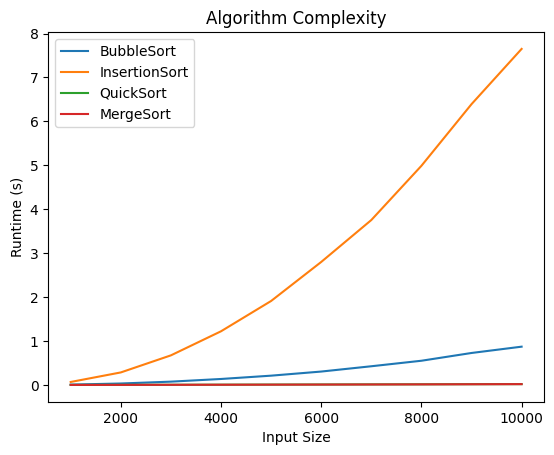

In [16]:
import timeit
import matplotlib.pyplot as plt
#import threading

BATCHRUNS=10

ALGOS = [
    "BubbleSort",
    "InsertionSort",
    "QuickSort",
    "MergeSort"
]
def sort(A, algoId):
    match algoId:
        case 0:
            bubbleSort(A)
        case 1:
            insertionSort(A)
        case 2:
            quickSort(A)
        case 3:
            mergeSort(A)

def runBatch(algoId, i, inputSize, runtimes):
    A = task2(f"assets/task1_{inputSize}.txt")
    runtimes[i] = timeit.timeit(lambda: sort(A, algoId), number = BATCHRUNS) / BATCHRUNS
  
plt.title("Algorithm Complexity")
plt.xlabel("Input Size")
plt.ylabel("Runtime (s)")

for algoId in range(len(ALGOS)):
    algorithm = ALGOS[algoId]
    inputSizes = list(range(1000, 10001, 1000))
    runtimes = [0] * len(inputSizes)
    threads = []
    for i, inputSize in enumerate(inputSizes):
        print(algorithm, inputSize)
        #threads += threading.Thread(target=runBatch, args=(algoId, i, inputSize, runtimes))
        runBatch(algoId, i, inputSize, runtimes)
#     for t in threads:
#         t.start()
#     for t in threads:
#         t.join()
        
    # plot runtimes against inputSizes
    
    plt.plot(inputSizes, runtimes, label=algorithm)

plt.legend()
plt.show()